In [1]:
import pandas as pd
import numpy as np
import os
import pandas as pd
import glob
import numpy as np
import matplotlib.pylab as plt
plt.figure(figsize=(20,10))
%matplotlib inline 
import seaborn as sns
import sklearn
import scipy
import tensorflow as tf
import math
import timeit


In [2]:
df=pd.read_csv('data_clust.csv', header=None)
df.shape
df.head()

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,-2.20243,-0.574106,-6.78421,-2.43637,-2.28676,-1.061320,-1.396050,-6.18320,-6.93734,-6.75859,...,-6.66383,-5.69793,-6.76522,-6.14721,-6.92017,-6.38389,-6.08320,-6.74807,-6.12753,-6.09497
1,-1.78500,-0.444601,-6.08639,-2.31255,-1.46379,-0.451503,-1.108550,-5.79833,-5.95591,-7.01259,...,-5.57356,-6.20284,-6.60527,-6.45421,-6.22176,-5.91659,-5.77094,-6.54771,-5.69566,-5.36605
2,-2.71998,-1.828610,-6.50998,-1.98596,-1.42878,-0.590429,-0.403125,-5.99940,-5.67518,-5.72028,...,-6.03319,-7.01264,-6.84003,-6.54604,-5.70527,-6.73675,-5.20082,-5.63525,-5.99084,-4.69566
3,-2.88735,-1.715090,-6.08733,-1.78564,-1.08051,-0.634591,-0.414766,-6.27433,-5.29611,-5.67247,...,-5.64745,-6.87816,-6.81495,-6.72227,-4.36778,-6.76653,-4.59964,-5.49961,-6.53587,-3.88017
4,-2.16550,-1.917750,-6.40865,-1.94179,-1.54037,-1.267810,-1.117900,-5.87232,-5.36341,-4.64141,...,-6.04762,-7.14228,-6.56706,-6.63142,-4.05589,-6.36894,-3.36560,-6.02235,-7.32030,-3.83486


In [3]:
dfx=df.iloc[:,0:100]
dfx.shape
xmean=dfx.mean(axis=1)
xmean
diffx=dfx.subtract(xmean, axis=0)
diffx=diffx**2
#diffx.head(5)
diffxsum=diffx.sum(axis=1)
diffxsum

0        1019.774302
1        1168.219219
2        1243.485521
3        1317.552985
4        1368.857216
            ...     
12055     155.223806
12056     150.341157
12057     147.113192
12058     129.499981
12059     134.753937
Length: 12060, dtype: float64

In [4]:
dfy=df.iloc[:,100:200]
dfy.shape
ymean=dfy.mean(axis=1)
ymean
diffy=dfy.subtract(ymean, axis=0)
diffy=diffy**2
#diffy.head(5)
diffysum=diffy.sum(axis=1)
diffysum

0        653.429338
1        692.565443
2        708.164262
3        744.414175
4        768.363399
            ...    
12055    229.752449
12056    242.608370
12057    241.769194
12058    227.828465
12059    248.549972
Length: 12060, dtype: float64

In [5]:
dfz=df.iloc[:,200:300]
dfz.shape
zmean=dfz.mean(axis=1)
zmean
diffz=dfz.subtract(zmean,axis=0)
diffz = diffz**2
# diffz.head(5)
diffzsum=diffz.sum(axis=1)
diffzsum

0        798.131216
1        769.254701
2        742.479524
3        688.336594
4        662.983888
            ...    
12055    183.225411
12056    174.860111
12057    190.978607
12058    204.162998
12059    222.051912
Length: 12060, dtype: float64

In [6]:
temdf=pd.DataFrame([diffxsum,diffysum,diffzsum])
temdf=temdf.T
temdf['Rg']=temdf.sum(axis=1)
Rg=np.sqrt(temdf['Rg']/100)
Rg

0        4.971252
1        5.128391
2        5.190500
3        5.244334
4        5.291696
           ...   
12055    2.383698
12056    2.382876
12057    2.408030
12058    2.369581
12059    2.460398
Name: Rg, Length: 12060, dtype: float64

In [7]:
df['Rg']=Rg

In [8]:
df

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,Rg
0,-2.20243,-0.574106,-6.78421,-2.43637,-2.28676,-1.061320,-1.396050,-6.18320,-6.93734,-6.75859,...,-5.69793,-6.76522,-6.14721,-6.92017,-6.38389,-6.08320,-6.74807,-6.12753,-6.09497,4.971252
1,-1.78500,-0.444601,-6.08639,-2.31255,-1.46379,-0.451503,-1.108550,-5.79833,-5.95591,-7.01259,...,-6.20284,-6.60527,-6.45421,-6.22176,-5.91659,-5.77094,-6.54771,-5.69566,-5.36605,5.128391
2,-2.71998,-1.828610,-6.50998,-1.98596,-1.42878,-0.590429,-0.403125,-5.99940,-5.67518,-5.72028,...,-7.01264,-6.84003,-6.54604,-5.70527,-6.73675,-5.20082,-5.63525,-5.99084,-4.69566,5.190500
3,-2.88735,-1.715090,-6.08733,-1.78564,-1.08051,-0.634591,-0.414766,-6.27433,-5.29611,-5.67247,...,-6.87816,-6.81495,-6.72227,-4.36778,-6.76653,-4.59964,-5.49961,-6.53587,-3.88017,5.244334
4,-2.16550,-1.917750,-6.40865,-1.94179,-1.54037,-1.267810,-1.117900,-5.87232,-5.36341,-4.64141,...,-7.14228,-6.56706,-6.63142,-4.05589,-6.36894,-3.36560,-6.02235,-7.32030,-3.83486,5.291696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12055,-22.47340,-21.776700,-22.54490,-22.33940,-19.83900,-20.392100,-19.686600,-21.24140,-21.00190,-21.16530,...,-18.45580,-18.58520,-18.94890,-20.48770,-20.40950,-18.88740,-19.46130,-18.39660,-18.30520,2.383698
12056,-22.14180,-22.228700,-22.22860,-22.86550,-19.67470,-20.334300,-19.714500,-21.29140,-21.08730,-21.25140,...,-17.85070,-18.84070,-19.51340,-20.50450,-21.11590,-18.96670,-19.40030,-18.55570,-17.93220,2.382876
12057,-21.52850,-22.391400,-22.46900,-23.27930,-20.00960,-20.286100,-19.809600,-21.42910,-21.06020,-21.43580,...,-17.47800,-19.92470,-19.55950,-20.35020,-21.24480,-19.02260,-18.59210,-18.41880,-17.84070,2.408030
12058,-21.31210,-22.158700,-22.70210,-23.06870,-20.49630,-20.664200,-19.869000,-21.53460,-20.85500,-20.74480,...,-17.78800,-20.01190,-19.79120,-20.65320,-21.37940,-18.73010,-18.38590,-18.02740,-17.17300,2.369581


In [9]:
df.to_csv('data_reg.csv')

In [10]:
data=pd.read_csv('data_reg.csv')
data=data.iloc[:,1:]

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [12]:
data=pd.DataFrame(scaler.fit_transform(data))
data

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
0,0.710591,0.740873,0.547199,0.741455,0.773017,0.802497,0.744242,0.580900,0.589981,0.634474,...,0.600817,0.554528,0.549675,0.525217,0.539929,0.551142,0.513436,0.544774,0.549715,0.328776
1,0.723895,0.744900,0.569207,0.745544,0.800938,0.823221,0.753272,0.592454,0.622624,0.626670,...,0.583271,0.560188,0.538886,0.550928,0.555804,0.562092,0.520488,0.560097,0.575321,0.348507
2,0.694096,0.701866,0.555848,0.756330,0.802126,0.818500,0.775430,0.586418,0.631961,0.666377,...,0.555129,0.551880,0.535658,0.569941,0.527941,0.582085,0.552601,0.549623,0.598872,0.356306
3,0.688762,0.705396,0.569178,0.762945,0.813941,0.816999,0.775064,0.578164,0.644569,0.667846,...,0.559803,0.552768,0.529465,0.619179,0.526930,0.603167,0.557375,0.530285,0.627519,0.363066
4,0.711768,0.699094,0.559043,0.757788,0.798340,0.795479,0.752978,0.590233,0.642330,0.699525,...,0.550624,0.561540,0.532658,0.630660,0.540437,0.646442,0.538977,0.502453,0.629111,0.369014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12055,0.064527,0.081608,0.050122,0.084155,0.177531,0.145549,0.169727,0.128819,0.122197,0.191824,...,0.157467,0.136246,0.099779,0.025751,0.063447,0.102131,0.066000,0.109455,0.120781,0.003857
12056,0.075095,0.067554,0.060098,0.066780,0.183105,0.147513,0.168850,0.127318,0.119356,0.189179,...,0.178495,0.127205,0.079941,0.025132,0.039449,0.099350,0.068147,0.103810,0.133884,0.003754
12057,0.094642,0.062495,0.052516,0.053114,0.171743,0.149151,0.165863,0.123184,0.120258,0.183513,...,0.191447,0.088844,0.078321,0.030813,0.035070,0.097390,0.096591,0.108668,0.137098,0.006913
12058,0.101539,0.069730,0.045164,0.060069,0.155231,0.136302,0.163997,0.120017,0.127082,0.204744,...,0.180674,0.085758,0.070178,0.019658,0.030497,0.107647,0.103848,0.122555,0.160554,0.002085


In [13]:
y=data.iloc[:,300].values
tempdata=data.iloc[:,:-1]
x=tempdata.values
print(x)
print(y)

[[0.71059109 0.74087299 0.54719862 ... 0.51343603 0.5447736  0.54971503]
 [0.72389517 0.74489977 0.56920719 ... 0.5204876  0.56009676 0.57532133]
 [0.69409605 0.70186596 0.55584757 ... 0.55260117 0.54962349 0.59887151]
 ...
 [0.09464213 0.06249501 0.05251563 ... 0.09659131 0.10866754 0.13709828]
 [0.1015391  0.06973048 0.04516388 ... 0.10384841 0.12255479 0.16055397]
 [0.10704967 0.0649856  0.03980225 ... 0.1063437  0.12931391 0.15905747]]
[0.32877552 0.34850738 0.35630642 ... 0.00691256 0.0020845  0.01348835]


In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.5,shuffle=False,random_state=0)

In [15]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
model = tf.keras.Sequential()
from sklearn.metrics import r2_score 
from keras.utils import to_categorical
from tensorflow.keras.layers import Dropout
from tensorflow.keras.regularizers import l2
from keras.layers import BatchNormalization
from keras.models import load_model
from keras.layers import Dropout
from keras.optimizers import SGD

In [53]:
model = Sequential()
model.add(Dense(300, activation='relu',kernel_regularizer=l2(0.001),kernel_initializer='normal', input_shape=(300,)))
#model.add(Dropout(0.5))
model.add(Dense(150, activation='relu', kernel_regularizer=l2(0.001),kernel_initializer='normal'))
#model.add(BatchNormalization())
model.add(Dense(100, activation='relu',kernel_regularizer=l2(0.001), kernel_initializer='normal'))
#model.add(BatchNormalization())
model.add(Dense(50, activation='relu', kernel_regularizer=l2(0.001),kernel_initializer='normal'))
# # model.add(Dropout(0.5))
model.add(Dense(20, activation='relu', kernel_regularizer=l2(0.001),kernel_initializer='normal'))
# model.add(BatchNormalization())
model.add(Dense(1,  activation='linear'))

In [54]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 300)               90300     
_________________________________________________________________
dense_33 (Dense)             (None, 150)               45150     
_________________________________________________________________
dense_34 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_35 (Dense)             (None, 50)                5050      
_________________________________________________________________
dense_36 (Dense)             (None, 20)                1020      
_________________________________________________________________
dense_37 (Dense)             (None, 1)                 21        
Total params: 156,641
Trainable params: 156,641
Non-trainable params: 0
________________________________________________

In [55]:
opt = SGD(lr=0.0001,momentum=0.99)
model.compile( loss='mse',optimizer='adam')

In [56]:
model.fit(X_train, Y_train, epochs=100, batch_size=64, verbose=2,validation_data=(X_test,Y_test))

Epoch 1/100
95/95 - 1s - loss: 0.2015 - val_loss: 0.0823
Epoch 2/100
95/95 - 0s - loss: 0.0512 - val_loss: 0.0444
Epoch 3/100
95/95 - 0s - loss: 0.0299 - val_loss: 0.0387
Epoch 4/100
95/95 - 0s - loss: 0.0252 - val_loss: 0.0349
Epoch 5/100
95/95 - 0s - loss: 0.0232 - val_loss: 0.0405
Epoch 6/100
95/95 - 0s - loss: 0.0223 - val_loss: 0.0397
Epoch 7/100
95/95 - 0s - loss: 0.0220 - val_loss: 0.0384
Epoch 8/100
95/95 - 0s - loss: 0.0213 - val_loss: 0.0391
Epoch 9/100
95/95 - 0s - loss: 0.0211 - val_loss: 0.0559
Epoch 10/100
95/95 - 0s - loss: 0.0214 - val_loss: 0.0533
Epoch 11/100
95/95 - 0s - loss: 0.0208 - val_loss: 0.0442
Epoch 12/100
95/95 - 0s - loss: 0.0206 - val_loss: 0.0415
Epoch 13/100
95/95 - 0s - loss: 0.0207 - val_loss: 0.0497
Epoch 14/100
95/95 - 0s - loss: 0.0207 - val_loss: 0.0440
Epoch 15/100
95/95 - 0s - loss: 0.0204 - val_loss: 0.0470
Epoch 16/100
95/95 - 0s - loss: 0.0204 - val_loss: 0.0443
Epoch 17/100
95/95 - 0s - loss: 0.0201 - val_loss: 0.0445
Epoch 18/100
95/95 - 0s

In [58]:
y_train_val=model.predict(X_train)
error2 = model.evaluate(X_test, Y_test, verbose=0)
r22 = r2_score(y_train_val,Y_train ) 
print('r2 score _ Train data : ', r22) 
print('MSE: %.3f, RMSE: %.3f' % (error2, math.sqrt(error2)))

r2 score _ Train data :  0.8175526442421418
MSE: 0.034, RMSE: 0.185


In [57]:
#Prediction
Y_pred = model.predict(X_test)
# evaluate the model
error = model.evaluate(X_test, Y_test, verbose=0)
r2 = r2_score(Y_test,Y_pred ) 
print('r2 score Test data: ', r22) 
print('MSE: %.3f, RMSE: %.3f' % (error, math.sqrt(error)))

r2 score Test data:  -0.5457242660821329
MSE: 0.034, RMSE: 0.185


Text(0, 0.5, 'Rg_predicted(Test)')

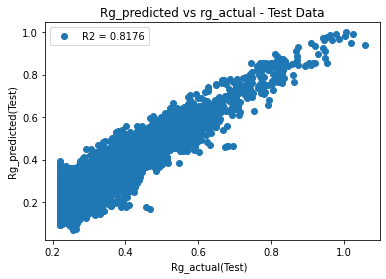

In [62]:
plt.plot(y_train_val,Y_train,'o',label='R2 = %.4f' %(r22)) 
plt.legend()
plt.title('Rg_predicted vs rg_actual - Test Data')
plt.xlabel('Rg_actual(Test)  ')
plt.ylabel('Rg_predicted(Test)')
